# Random variable

A random variable is a mapping $X: \Omega \rightarrow \mathbb{R}$ that assigns a real number $X(\omega)$ to each outcome $\omega$,
> e.g. the number of heads flipping a coin twice  

In [221]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm
import numpy as np
from scipy.stats import randint

In [222]:
df = pd.DataFrame.from_dict({
    'w': ['TT', 'TH', 'HT', 'HH'],
    'P(w)': [1/4, 1/4, 1/4, 1/4],
    'X(w)': [0, 1, 1, 2]
})
df

,w,P(w),X(w)
0,TT,0.25,0
1,TH,0.25,1
2,HT,0.25,1
3,HH,0.25,2


In [223]:
df = pd.DataFrame.from_dict({
    'w': ['TT', 'TH', 'HH'],
    'P(w)': [1/4, 1/2, 1/4],
    'X(w)': [0, 1, 2]
})
df

,w,P(w),X(w)
0,TT,0.25,0
1,TH,0.50,1
2,HH,0.25,2


## probability density function
> PDF

It defines the probability of a **continius** random variable having a given values

## cumulative distribution funcion 
> CDF

It describes the probabilities of a random variable having values less than or equal to x, $F_x: \mathbb{R} \rightarrow [0, 1]$ of $X$ is defined by:

$F_X(x) = \mathbb{P}(X \leq x)$

In [224]:
coin_cumsum = df.cumsum()
coin_cumsum

,w,P(w),X(w)
0,TT,0.25,0
1,TTTH,0.75,1
2,TTTHHH,1.00,3


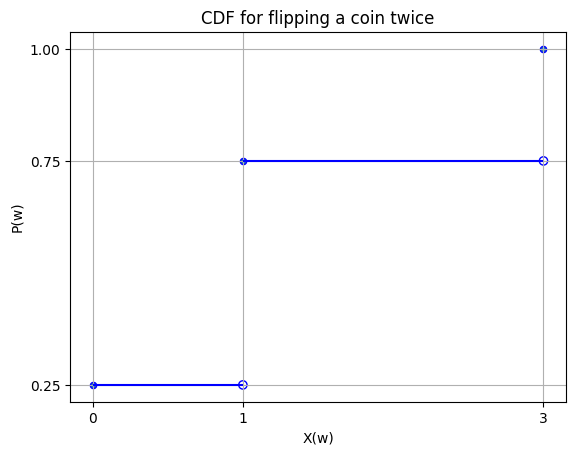

In [225]:
color = 'b'

ax = coin_cumsum.plot.scatter(x='X(w)', y='P(w)',
                              grid=True,
                              xticks=coin_cumsum['X(w)'],
                              yticks=coin_cumsum['P(w)'],
                              facecolors=color, edgecolors=color,
                              title='CDF for flipping a coin twice')

ax.scatter(x=coin_cumsum['X(w)'].shift(-1),
           y=coin_cumsum['P(w)'],
           facecolors='none', edgecolors=color)

ax.hlines(xmin=coin_cumsum['X(w)'].shift(-1), 
          xmax=coin_cumsum['X(w)'], 
          y=coin_cumsum['P(w)'],
         color=color)

<StemContainer object of 3 artists>

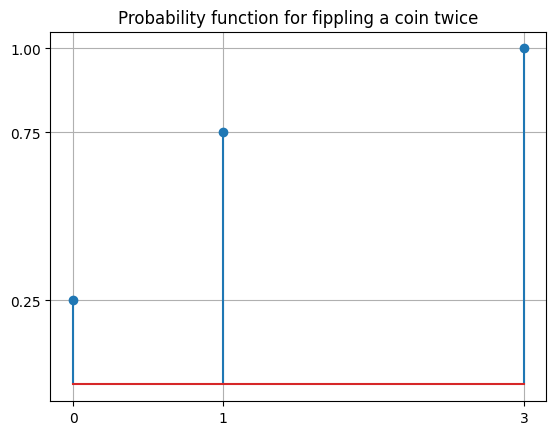

In [226]:
plt.xticks(ticks=coin_cumsum['X(w)'])
plt.yticks(ticks=coin_cumsum['P(w)'])
plt.grid(True)
plt.title('Probability function for fippling a coin twice')
plt.stem(coin_cumsum['X(w)'], coin_cumsum['P(w)'])

## Important random variable distributions

### uniform distribution

> all outcomes have an equal chance of occurring

\begin{equation}
\mathbb{P}(X=x) = p_x(x) =
    \begin{cases}
        \frac{1}{b-a+1} & \text{for} x=a, a+1, ..., b\\
        0 & \text{otherwise}
    \end{cases}
\end{equation}


#### discrete case

$E[X] = \sum_{x=a}^{b} xp_x(X=x) = \sum_{x=a}^{b} \frac{x}{b-a+1} =  \frac{1}{b-a+1} \sum_{x=a}^{b} x$

1. $\mathbb{S} = \sum_{x=a}^{b} x = a + (a+1) + (a+2) + (a+3) + ... + (b-1) + b$
2. $\mathbb{S} = \sum_{x=a}^{b} x = b + (b-1) + (b-2) + (b-3) + ... + (a+1) + b$

$1+2 = 2\mathbb{S} = a(b-a-1) + 2b + b(b-a-1) + 2a$  
$2\mathbb{S} = ab - a^2 -a + 2b + b^2 - ba - b + 2a$  
$2\mathbb{S} = b^2 - a^2 + b + a$  
$\mathbb{S} = \frac{b^2 - a^2 + b + a}{2}$  

$E[X] = \frac{b^2 - a^2 + b + a}{2(b - a + 1)}$  

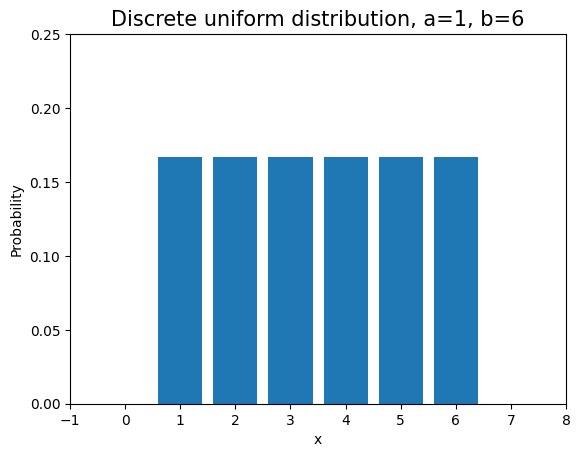

In [247]:
a, b = 1, 6
x = np.arange(1, b+1)

dics_uniform = randint.pmf(x, a, b+1)

plt.bar(x, dics_uniform)
plt.xlabel('x')
plt.ylabel('Probability')
plt.xlim([a-2, b+2])
plt.ylim([0, 0.25])
plt.title(f'Discrete uniform distribution, a={a}, b={b}',
          fontsize= 15)
plt.show()

### Normal or Gaussian distribution

$X \sim N(\mu, \sigma^2)$  

$E[X] = \mu$  
$Var(X) = \sigma^2$  

$f_x(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma_2})}, for -\infty < x < \infty$


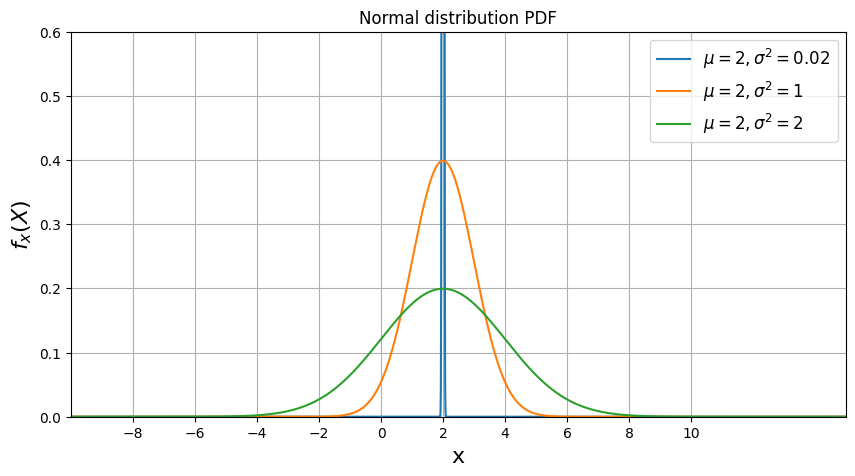

In [241]:
x = np.arange(-10, 15, 0.01)
mu = 2

sigmas = 0.02, 1, 2

y_data = [norm.pdf(x, loc = mu, scale = sigma) for sigma in sigmas]

plt.figure(figsize=(10, 5))

for i, y in enumerate(y_data):
    plt.plot(x, y, label=f'$\mu={mu}, \sigma^2={sigmas[i]}$')

plt.title('Normal distribution PDF')
plt.xlabel('x', fontsize=16)
plt.ylabel('$f_x(X)$', fontsize=16)
plt.xlim([min(x), max(x)])
plt.ylim([0, .6])
plt.xticks(np.arange(-8, 12, 2))
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()